<a href="https://colab.research.google.com/github/HanlunAI/ATasteOfDeepLearning/blob/main/ST5_000_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Taste of Deep Learning through Python 

##Preface
In the beginning, computers were invented with an aim to supplement human thinking methods, more specifically, to help us think straight through the midst of complexity. Using *Google Colab* (a programmable environment for Python from a broswer), this workshop offers a variety of stories of important concepts that might help audience make informed decisions for their future path and career. Instead of going into any technicality, we shall emphasize more on intuition behind many notions. In this approach, not only will audience be exposed to many mathematical and computational knowledge, but we will also get a taste of nowadays deep learning through Python.

### 0.0 Motivation and Introduction

To begin our stories, let's start looking at, comparing and contrasting the following two figures:

![picture](https://drive.google.com/uc?id=1GztE41F_UkPiVaDUnILbdc0orRXFFUQK)

In comparison, one should have noticed both pictures are pretty colorful. Indeed, both pictures are indicating labelling of certain data by their coloring!

In contrast, one may observe that the coloring scheme on the left is discretized while the one on the right seems to be continuous. This is because they actually come from problems of rather different nature...

By the end of the workshop, we shall learn that the left one attempts to visualize the landscape of a *classification problem* of digits; whereas the right one tries to model a physical system coming from a *boundary value problem*. Surprisingly, both problems can be solved with some optimization techniques known as *deep learning*. 

To this end, we shall devote our workshop into four main Colab notebooks, dedicating each of which to explore the **Basics**, the **Classics**, the **Modern**, and the **Frontiers** of relevant subjects.

### 0.1 Hello World

Just like other programming course, we shall get ourselves familized with the programmable enviornment by saying hello. 

To do so, you may either type "**Shift+Enter**" or simply click the "**Run**" button in the next code cell.

In [ ]:
print("Hello World~")

Hello World~


There are *code cells* and *text cells* in a Colab notebook. For a smooth flow, please make sure you have run previous cells before running the next one.

### 0.2 Plotting


Python could be used like a calculator (a.k.a. computing device), but a really powerful one, largely thanks to its fabulous community that co-created many modules and packages. In ascending order of speciality, we have [NumPy](https://numpy.org/) for convenient array manipulation; [Matplotlib](https://matplotlib.org/) for visualization; [SciPy](https://scipy.org/) for scientific computing; [sklearn](https://scikit-learn.org/stable/) for machine learning; [TensorFlow](https://www.tensorflow.org/) and [PyTorch](https://pytorch.org/) for popular deep learning frameworks.

And yet, we shall first make a simple function plot to relate *continuous input* to *categorial output*:

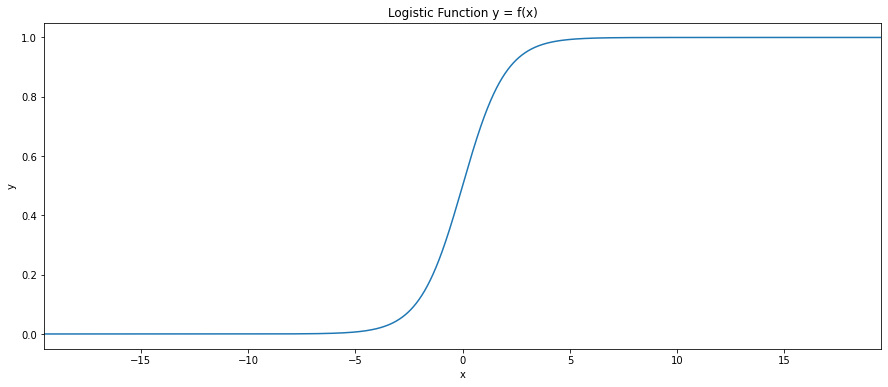

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-30, 30, 6000, endpoint = False)
#the standard logistic function
y = 1/(1+np.exp(-x))
#multiply a scaler to the input could control sharpness of jump in logistic function
#y = 1/(1+np.exp(-(100*x)))
#shifting is also easy, just remember to reset xlim if the shift is too much
#y = 1/(1+np.exp(-(100*(x-10))))

#you may google for more settings of Matplotlib
plt.rcParams["figure.figsize"] = (15,6)
plt.xlim((-19.5,19.5))
plt.title("Logistic Function y = f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

**0.2.1** Tips

*   You may add a code cell to explore the code if you wish. A better way to keep the notebook tidy is to select **Insert -> Scratch Code Cell**.
*   One way to comment codes in Python begins with the hash mark “#”. You may uncomment some codes above to reshape the logistic function from its standard position.
*   Suppose you want to look into certain variable, say **x**, you may run **print(x)**, or query its property with suitable methods such as **print(type(x))**, **print(len(x))**, **print(x.shape)**, **print(type(x[0]))**, **print(x[::50])**, etc.
*   You may search google for more common practice in Python. More basics can be found in our Easter workshop. [Stack Overflow](https://stackoverflow.com/) is also your good friend.
*   For higher dimensional analogs, there is a generalization known as the *softmax* function.

### 0.3 Approximation

S-shaped functions also occur often during the investigation of *Cumulative Distribution Functions (CDFs)* of random variables since CDFs are *monotonic increasing* function with $0$ as the asymptotic lower bound and $1$ as the asymptotic upper bound.

Random variables are useful notions to describe disturbance in data. As disturbance/error may come from a mixture of various sources. A very common way of handling is to approximate by the [*Normal Distribution*](https://mathworld.wolfram.com/NormalDistribution.html) (also known as *Gaussian Distribution*), whose corresponding CDF is known as the *Gaussian error function*.

**0.3.1** Toy Example

Let's consider the scanning of $n$ pixels, each of which has an independently identically distributed chance of $0\leq p \leq 1$ for an error to occur. Then the total number of mis-scanned pixels would follow a [*Binomial Distribution*](https://mathworld.wolfram.com/BinomialDistribution.html) $B(n,p)$. For sufficiently large $n$, this can be approximated by a Normal Distribution $N(\mu, \sigma^2)$ where $\mu = np$ and $\sigma^2 = np(1-p)$, to match the first moment and second central moment. You may play with the next code cell to get some feelings.

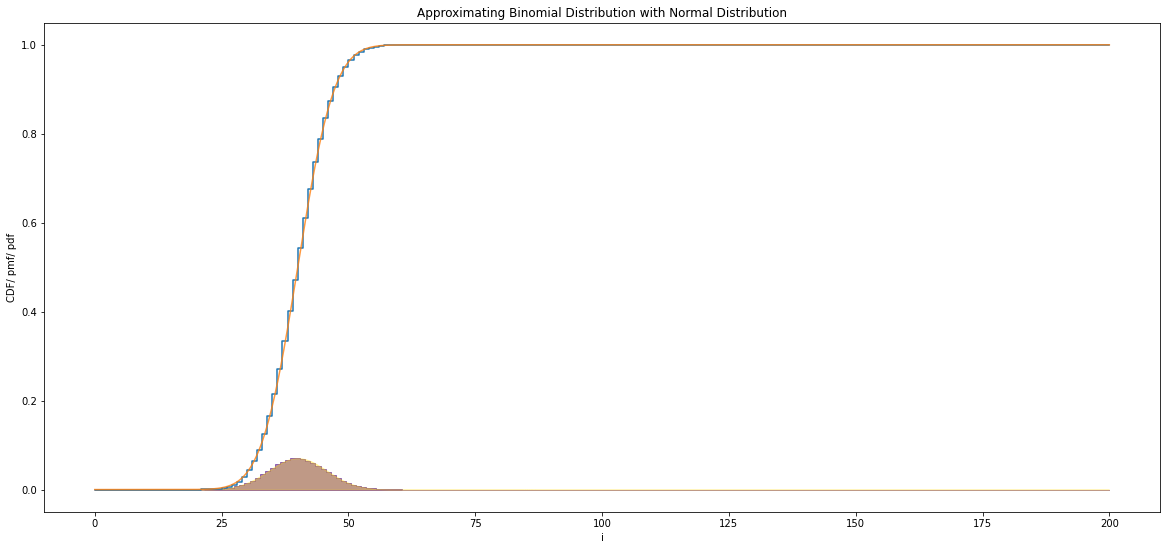

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

#@title Select values of p and n with the sliders and run the result
n = 200#@param{type:"slider", max:1000, min:1, step:"1"}
p = 0.2#@param{type:"slider", max:1, min:0, step:"0.0001"}
plt.rcParams["figure.figsize"] = (20,9)
plt.title("Approximating Binomial Distribution with Normal Distribution")

def binomial(p):
  count = 0
  layer = np.array([1])
  yield count, layer
  q = 1-p
  while True:
    count += 1
    first = np.append(layer*q, np.array([0]))
    second = np.append(np.array([0]), layer*p)
    layer = first + second
    yield count, layer

def bin(n, p):
  for count, pmf in binomial(p):
    if count == n:
      support = np.array(range(n+1))
      #first moment (mean)
      mean = n*p #mean = np.dot(pmf, support)
      #second central moment (varience)
      varience = n*p*(1-p) #varience = np.dot(pmf, (support-mean)**2)
      return mean, varience, pmf 

support = [i for i in range(n+1)]
mean, varience, pmf = bin(n, p)
plt.step(support, pmf.cumsum(), where='post')
plt.fill_between(support, pmf, step="mid", alpha=0.5, color = "indigo")

x = np.linspace(0, n, 1000)
Lx = (x-mean)/np.sqrt(varience)
F = (special.erf(Lx/np.sqrt(2))+1)/2
p = np.diff(F)/(x[1]-x[0])
plt.plot(x, F, alpha=0.8)
midpoint = (x[1:]+x[0:-1])/2
plt.fill_between(midpoint, p, step="mid", alpha=0.3, color = "gold")

plt.ylabel("CDF/ pmf/ pdf")
plt.xlabel("i")
plt.show()


**0.3.2** Checkpoint

Choose different values of $n$ and $p$ with the sliders and re-run the previous code cell and attempt to walk through the following questions:-

1.   Which curve correspond to the Cumulative Distribution Function (CDF) of $B(n,p)$?

2.   Which curve correspond to the Cumulative Distribution Function (CDF) of $N(\mu,\sigma^2)$?

3.   The relationship between CDFs of $B(n,p)$ and $N(\mu,\sigma^2)$?

4.   Which filled area correspond to the probability mass function (pmf) of $B(n,p)$?

5.   The relationship between CDF and pmf of $B(n,p)$?

6.   Which filled area correspond to the probability density function (pdf) of $N(\mu,\sigma^2)$?

7.   The relationship between CDF and pdf of $N(\mu,\sigma^2)$?

8.   The relationship between pmf of $B(n,p)$ and pdf of $N(\mu,\sigma^2)$?



**0.3.3** Remarks
*   In reality, the distribution of error source may not be a binomial distribution, and may be even be unknown.

*   Yet, so long as we assume random variables are identically independently distributed (i.i.d.), we may refer to Central Limit Theorem (CLT) to approximate the average of these random variables with Gaussian Distribution for sufficiently many samples. While the toy example takes the scanning process of a pixel as a random variable, it can be generalized to the acquisition process of a datum in other cases.

*   The toy example actually has very practical implication in the real world. Many scanning systems (such as QR codes and barcodes) employed genius idea from **error correction code** (a popular class is the [Reed-Solomon codes](https://en.wikiversity.org/wiki/Reed%E2%80%93Solomon_codes_for_coders)) to trade redundancy for fault-tolerant capability. In design of codes, an estimation of percentage of possible mis-scanned pixels would be helpful to determine how much redundancy to be allowed.

*   A natural generalization of Gaussian Distribution in high dimension is the [multivariate Gaussian Distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) (a.k.a. multivariate Normal Distribution). This is extremely useful in our world of data science.

### [Go Ahead](https://github.com/HanlunAI/ATasteOfDeepLearning/blob/main/ST5-001-Classics.ipynb)

The previous code cells are like fast recap and enrichment of what we learnt in our [Easter workshop](https://github.com/HanlunAI/NextGenCurriculumDemonstration). For those who didn't attend that workshop, you may feel free to walk through at your leisure [Demonstration Alpha](https://github.com/HanlunAI/NextGenCurriculumDemonstration/blob/main/DemonstrationAlpha.ipynb)-[Beta](https://github.com/HanlunAI/NextGenCurriculumDemonstration/blob/main/DemonstrationBeta.ipynb)-[Gamma](https://github.com/HanlunAI/NextGenCurriculumDemonstration/blob/main/DemonstrationGamma.ipynb)-[Delta](https://github.com/HanlunAI/NextGenCurriculumDemonstration/blob/main/DemonstrationDelta.ipynb)-[Epsilon](https://github.com/HanlunAI/NextGenCurriculumDemonstration/blob/main/DemonstrationEpsilon.ipynb) and [other variants](https://github.com/HanlunAI/NextGenCurriculumDemonstration/blob/main/CollaborationDerivatives.ipynb) to get yourself familized with some basic data types, operation, function, control flow, recursion, plottings in Colab.

Note that materials in both workshop are shared with [MIT License](https://en.wikipedia.org/wiki/MIT_License), that allows duplication and re-distribution upon the inclusion of [copyright notice](https://github.com/HanlunAI/ATasteOfDeepLearning/blob/main/LICENSE).

Last and foremost, we have to thank all students joining the workshop, without whom this set of material won't be published here. We would also thank Dr. K. K. Wong of Hanlun Information Limited, Bobby Poon from St. Paul's College, and all interns from Department of Computer Science and Department of Mathematics via HKU STEM Internship Scheme for making this happen.

© Hanlun Artificial Intelligence Limited